/usr/local/opt/pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/matplotlib/figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/usr/local/opt/pyenv/versions/anaconda-2.4.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


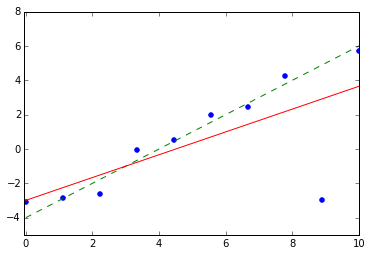

In [1]:
# 誤差関数（重み付け最小二乗法）による回帰分析
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy import dot
from numpy.random import normal
 
#パラメータ
N=10          # サンプルを取得する位置xの個数
m =1     # 多項式の次数
 
# データセット {x_n,y_n} (n=1...N) を用意
def create_dataset(num):
    dataset = DataFrame(columns=['x','y'])    #カラムがx,yのデータフレームをつくる
    for i in range(num):
        x = float(i)/float(num-1) * 10     #10をnumで分割して位置xにする
        y = x - 4 + normal(scale=0.5)     #y = x - 4にノイズを加えたものをサンプル点とする
        if i == 8:  #外れ値をつくる
            y = -3
        dataset = dataset.append(Series([x,y], index=['x','y']),         #dataframeにSeriesをappendする
                                 ignore_index=True)
    return dataset
 
dataset = create_dataset(10)

W = np.diag(np.ones(N))
 
 
t = dataset.y      #dataframe.yでSeriesがとれる
phi = DataFrame()   #空のDataFrameをつくる
for i in range(0,m+1):     #phiを生成
    p = dataset.x**i         #xのSeriesのi乗したものをつくる
    phi = pd.concat([phi,p], axis=1)      #(m+1)×(m+1)の行列をつくる    axis=1で列で次々とつなげていく
 
def g(w):  #Wの関数にする
    tmp = dot(phi.T, dot(w, phi))
    return dot(np.linalg.inv(tmp),dot(phi.T, dot(w, t)))
 
ws = g(W)
 
def f(x, ws):          #モデル式f(x)
    y = 0
    for i, w in enumerate(ws):        #インデックス付き処理をする
        y += w * (x ** i)
    return y
 
fig = plt.figure()                          #図をつくる宣言
plt.xlim(-0.05,10)    #x軸設定
plt.ylim(-5,8)         #y軸設定
 
# データセットを表示
plt.scatter(dataset.x, dataset.y, marker='o', color='blue')      #点が表示される
 
        # 真の曲線を表示
linex = np.arange(0,10.01,0.01)     #配列をつくる
liney = linex - 4
plt.plot(linex, liney, color='green', linestyle='--')
 
        # 多項式近似の曲線を表示
linex = np.arange(0,10.01,0.01)
liney = f(linex, ws)                                    #求めたfを使って曲線をかく
plt.plot(linex, liney, color='red')
 
fig.show()

In [2]:
#テューキー損失を定義
def w_tukey(r):
    if abs(r) <= e:
        return (1 - r ** 2/ e ** 2) ** 2
    else:
        return 0
#フーバー損失を定義
def w_huber(r):
    if abs(r) <= e:
        return 1
    else:
        return e/abs(r)

In [3]:
e = float(10) #ηの値 ハイパーパラメータ

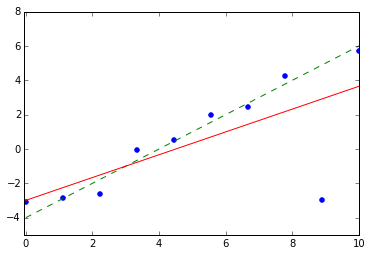

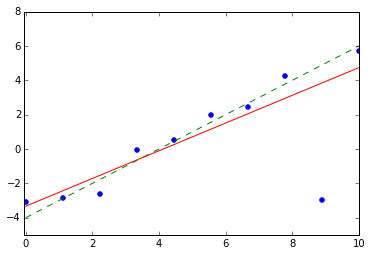

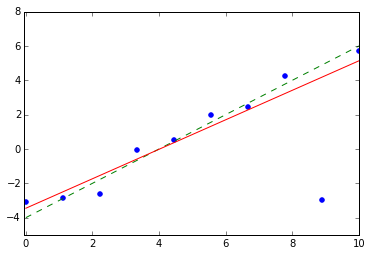

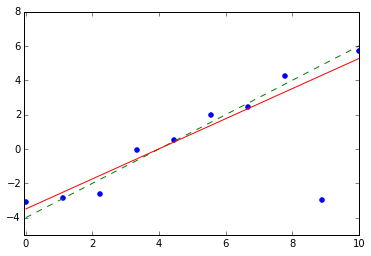

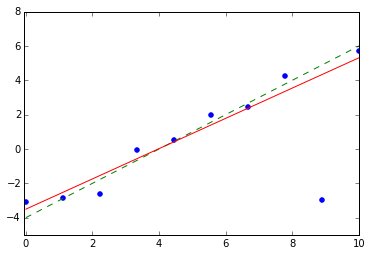

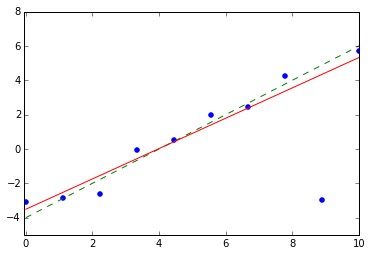

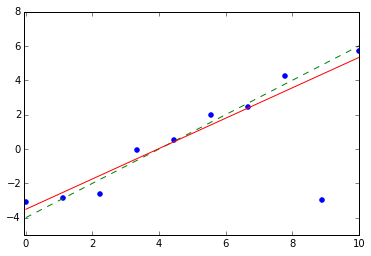

In [4]:
Ws = DataFrame()
W = np.diag(np.ones(N))
W1 = np.diag(np.zeros(N))
i = 0
while i < 20:
    if (np.round(np.diag(W1),3) == np.round(np.diag(W),3)).all():    #有効数字三桁で丸めたWの要素がすべて収束したらループをぬける
        break
    W1 = W
 
    ws = g(W)
    r = f(dataset.x, ws) - t #残差をもとめる
    W = np.diag(map(lambda x : w_tukey(x), r))  #Wを更新
 
    Ws = Ws.append(Series(np.diag(W)), ignore_index=True)
 
    fig = plt.figure()                          #図をつくる宣言？
    plt.xlim(-0.05,10)    #x軸設定
    plt.ylim(-5,8)         #y軸設定
 
    # データセットを表示
    plt.scatter(dataset.x, dataset.y, marker='o', color='blue')      #点が表示される
 
        # 真の曲線を表示
    linex = np.arange(0,10.01,0.01)     #配列をつくる
    liney = linex - 4
    plt.plot(linex, liney, color='green', linestyle='--')
 
        # 多項式近似の曲線を表示
    linex = np.arange(0,10.01,0.01)
    liney = f(linex, ws)                                    #求めたfを使って曲線をかく
    plt.plot(linex, liney, color='red')
 
    fig.show()
 
    i += 1

In [5]:
e = float(1) #ηの値
 
W = np.diag(map(lambda x : w_huber(x), r))  #上記と同じコード　重み関数だけ変える。

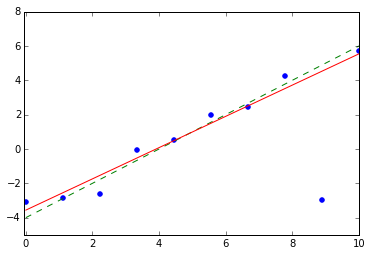

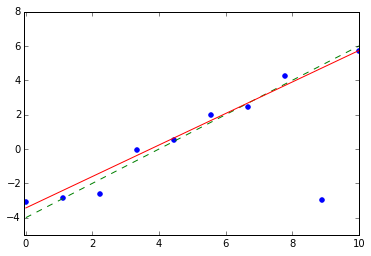

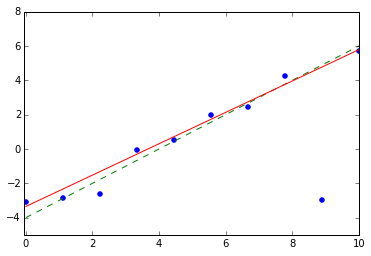

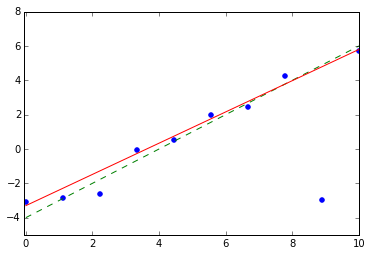

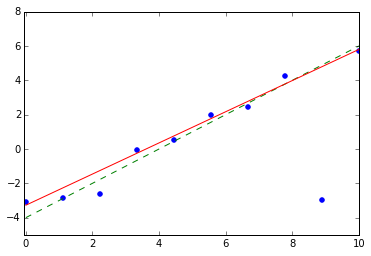

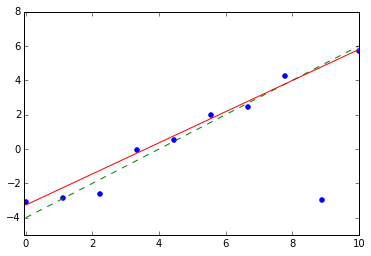

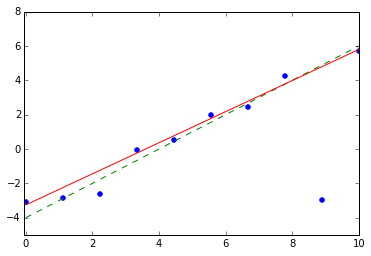

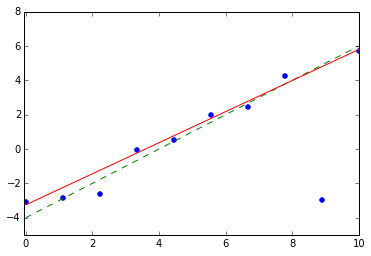

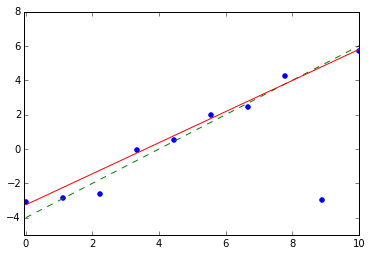

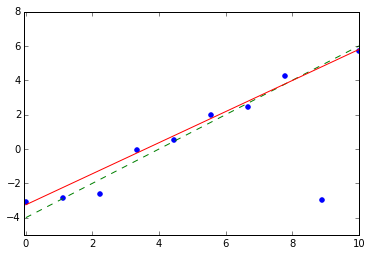

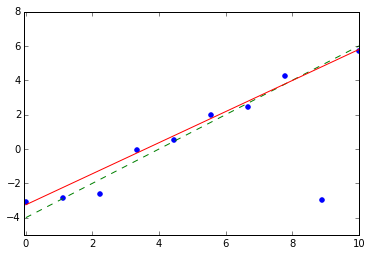

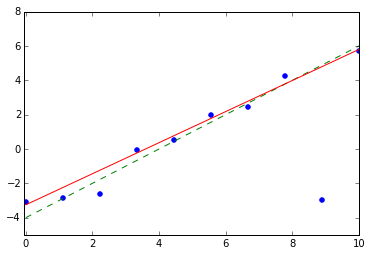

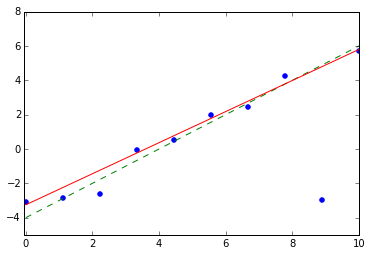

In [6]:
Ws = DataFrame()
W1 = np.diag(np.zeros(N))
i = 0
while i < 20:
    if (np.round(np.diag(W1),3) == np.round(np.diag(W),3)).all():    #有効数字三桁で丸めたWの要素がすべて収束したらループをぬける
        break
    W1 = W
 
    ws = g(W)
    r = f(dataset.x, ws) - t #残差をもとめる
    W = np.diag(map(lambda x : w_tukey(x), r))  #Wを更新
 
    Ws = Ws.append(Series(np.diag(W)), ignore_index=True)
 
    fig = plt.figure()                          #図をつくる宣言？
    plt.xlim(-0.05,10)    #x軸設定
    plt.ylim(-5,8)         #y軸設定
 
    # データセットを表示
    plt.scatter(dataset.x, dataset.y, marker='o', color='blue')      #点が表示される
 
        # 真の曲線を表示
    linex = np.arange(0,10.01,0.01)     #配列をつくる
    liney = linex - 4
    plt.plot(linex, liney, color='green', linestyle='--')
 
        # 多項式近似の曲線を表示
    linex = np.arange(0,10.01,0.01)
    liney = f(linex, ws)                                    #求めたfを使って曲線をかく
    plt.plot(linex, liney, color='red')
 
    fig.show()
 
    i += 1